In [88]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

In [90]:
style.use("ggplot")


In [92]:
data = pd.read_csv("student-mat.csv", sep=";")

In [94]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [96]:
predict = "G3"

In [98]:
data = data[[ "G1", "G2", "G3", "studytime", "health", "famrel", "failures", "absences"]]
data = shuffle(data)

In [100]:
x = np.array(data.drop(columns=[predict]))
y = np.array(data[predict])

In [102]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1)

In [104]:
print(x_train.shape, x_test.shape, y_test.shape, y_test.shape)

(355, 7) (40, 7) (40,) (40,)


In [106]:
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)
acc = linear.score(x_test, y_test)
print("Accuracy (R-squared):", acc)

Accuracy (R-squared): 0.8696010773203714


In [108]:
with open("studentgrades.pickle", "wb") as f:
    pickle.dump(linear, f)
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)

In [110]:
print('Coefficient (weights for each feature): \n', linear.coef_)
print('Intercept (the starting value): \n', linear.intercept_)

Coefficient (weights for each feature): 
 [ 0.15159961  0.988397   -0.2133667   0.0999122   0.26227881 -0.27386366
  0.03430077]
Intercept (the starting value): 
 -2.894780502622419


In [112]:
predictions = linear.predict(x_test)

In [114]:
print("Example Predictions:")
for i in range(5):
    print("Predicted Grade:", predictions[i])
    print("Student's Data:", x_test[i])
    print("Actual Grade:", y_test[i])
    print()

Example Predictions:
Predicted Grade: -1.3607850485469342
Student's Data: [5 0 1 5 5 3 0]
Actual Grade: 0

Predicted Grade: 3.8849008657837594
Student's Data: [6 5 2 1 4 0 6]
Actual Grade: 6

Predicted Grade: 18.967302569021925
Student's Data: [19 18  2  5  4  0  2]
Actual Grade: 18

Predicted Grade: 13.30939715756134
Student's Data: [13 13  2  5  5  0  0]
Actual Grade: 12

Predicted Grade: 13.065225946405072
Student's Data: [13 13  2  3  3  0 14]
Actual Grade: 14



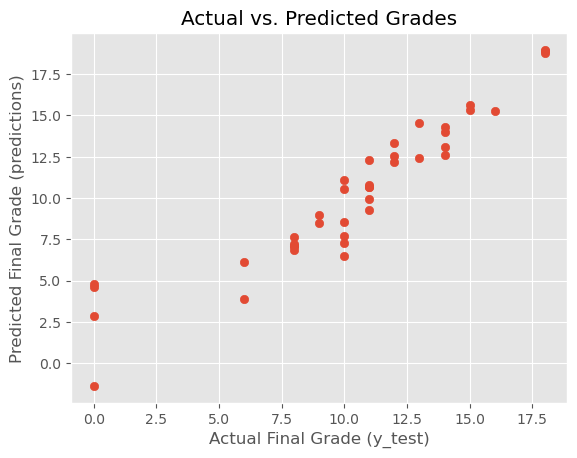

In [116]:
plt.scatter(y_test, predictions)
plt.xlabel("Actual Final Grade (y_test)")
plt.ylabel("Predicted Final Grade (predictions)")
plt.title("Actual vs. Predicted Grades")
plt.show()

In [124]:
# print("--- Student Performance Predictor ---")
print("Please enter the following information:")

g1 = int(input("First period grade (G1) (0-20): "))
g2 = int(input("Second period grade (G2) (0-20): "))
studytime = int(input("Weekly study time (1-4): "))
health = int(input("Current health status (1-5): "))
famrel = int(input("Quality of family relationships (1-5): "))
failures = int(input("Number of past class failures (0-4): "))
absences = int(input("Number of school absences (0-93): "))

user_data = np.array([[g1, g2, studytime, health, famrel, failures, absences]])
predicted_score = linear.predict(user_data)

print("---------------------------------")
print(f"Predicted Final Score (G3): {predicted_score[0]:.2f}") 

if predicted_score[0] >= 10:
    print("Prediction: You will PASS!")
else:
    print("Prediction: You are at risk of FAILING.")

Please enter the following information:


First period grade (G1) (0-20):  14
Second period grade (G2) (0-20):  15
Weekly study time (1-4):  3
Current health status (1-5):  4
Quality of family relationships (1-5):  5
Number of past class failures (0-4):  0
Number of school absences (0-93):  3


---------------------------------
Predicted Final Score (G3): 15.23
Prediction: You will PASS!
